# Exploratory

## Data Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/raw/ResectMap_DATA_2023-11-13_2306.csv")
# Dataframe with basic information per patient
df_mrn = df[df["mrn"].notna()]
# Dataframe with Engel outcomes
df_engel = df[df["redcap_repeat_instrument"] == "engel_outcomes"]

C:\Users\Amaury\AppData\Local\Temp\ipykernel_31764\743729105.py:5: DtypeWarning: Columns (8,20,31,39,65,79,83,85,127,130,132,150,153,161,308,313,317,321,325,329,330,334,377,385,403,409,439,440,441,442,443,444,445,453,463,475,512,523,524,525,526,527,528,529,537,566,572,574,588,589,590,591,592,601,602,604,605,606,608,620,621,622,627,633,636,637,639,646,647,658,676,677,682,695,698,712,714,718,720,721,723,725,726,728,732,733,735,748,750,754,757,759,761,762,764,768,770,772,774,776,780,782,786,787,791,796,803,810,812,813,814,815,817,818,880,887,888,896,904,905,906,968,975,976,984,992,993,994,1056,1063,1064,1072,1080,1081,1082,1144,1151,1152,1169,1170,1232,1239,1240,1257,1258,1320,1327,1328,1345,1408,1415,1416,1432,1433,1496,1503,1521,1523,1540,1541,1558,1559,1576,1577,1595,1613,1631,1649,1667,1669,1670,1671,1678,1730,1738,1790,1801,1802,1811,1819,1820,1821,1822,1823,1830,1882,1890,1942,1953,1954,1963,1971,1972,1973,1974,1975,1982,2034,2042,2094,2105,2106,2115,2124,2125,2126,2127,2134,2186,21

In [4]:
# Print the number of participants
print("Number of participants in the main df:", df["record_id"].nunique())
print("Number of participants in the MRN df:", df_mrn["record_id"].nunique())
print("Same as number of row ?", df_mrn["record_id"].nunique()==len(df_mrn))
print("Number of participants in the Engel df:", df_engel["record_id"].nunique())
print("Same as number of row ?", df_engel["record_id"].nunique()==len(df_engel))

Number of participants in the main df: 677
Number of participants in the MRN df: 677
Same as number of row ? True
Number of participants in the Engel df: 677
Same as number of row ? False


## Distribution of age

In [5]:
print("Minimum age:", df_mrn["age"].min(), "\nMaximum age:", df_mrn["age"].max())

Minimum age: 2.0 
Maximum age: 84.0


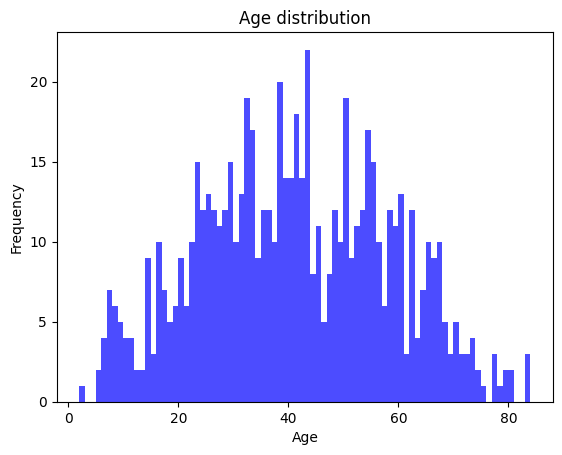

In [6]:
# Create a histogram
plt.hist(df_mrn["age"], bins=82, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# Show the plot
plt.show()

## Distribution of sex/gender

In [7]:
# Before, 1 represented female and 2 represented male
# Now, 0 represents female and 1 represents male
df_mrn["sex_gender"] = df_mrn["sex_gender"].map({1: 0, 2: 1})

# Define a mapping dictionary
gender_mapping = {0: 'female', 1: 'male'} 

# Count the number of males and females in the dataset
df_mrn["sex_gender"].replace(gender_mapping).value_counts()

C:\Users\Amaury\AppData\Local\Temp\ipykernel_31764\1867859755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mrn["sex_gender"] = df_mrn["sex_gender"].map({1: 0, 2: 1})


sex_gender
female    345
male      332
Name: count, dtype: int64

In [8]:
# Print patients with multiple Engel outcomes
df_engel[df_engel['record_id'].duplicated()]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_nw_z,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2044,RSCT041607,engel_outcomes,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2814,RSCT058378,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3117,RSCT064938,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3259,RSCT066862,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4412,RSCT091205,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution of Engel outcomes

In [9]:
# Create 1 column out of the 4 dummy variables for engel outcome
df_engel['surg_engel'] = df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].idxmax(axis=1).str.split('___').str[1].astype(int)
df_engel[["record_id", "surg_engel"]].head()

C:\Users\Amaury\AppData\Local\Temp\ipykernel_31764\327928731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engel['surg_engel'] = df_engel[['surg_engel___1', 'surg_engel___2', 'surg_engel___3', 'surg_engel___4']].idxmax(axis=1).str.split('___').str[1].astype(int)


,record_id,surg_engel
9,RSCT000111,2
26,RSCT000208,3
35,RSCT000277,4
40,RSCT000508,1
48,RSCT000749,2


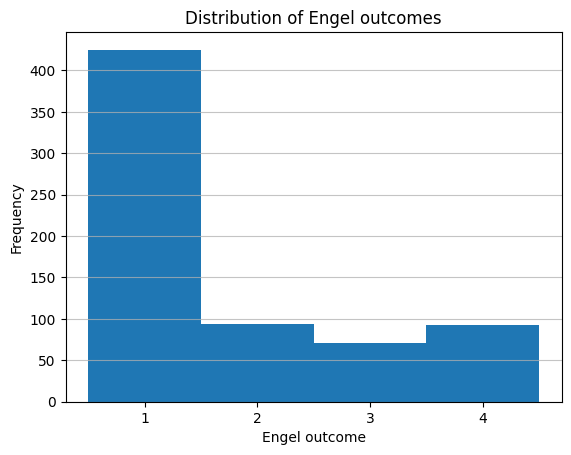

In [10]:
# Create a histogram of the 'surg_engel' variable
plt.hist(df_engel['surg_engel'], bins=[1, 2, 3, 4, 5])  # Specify the bin edges

# Customize x-axis ticks and labels
bin_centers = [1.5, 2.5, 3.5, 4.5]
plt.xticks(bin_centers, ['1', '2', '3', '4'])

# Add labels and title
plt.xlabel('Engel outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Engel outcomes')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

### Distribution of Engel classes

Class I

    IA: Completely seizure-free since surgery
    IB: Non disabling simple partial seizures only since surgery
    IC: Some disabling seizures after surgery, but free of disabling seizures for at least 2 years
    ID: Generalized convulsions with antiepileptic drug withdrawal only

Class II
    
    IIA: Initially free of disabling seizures but has rare seizures now
    IIB: Rare disabling seizures since surgery
    IIC: More than rare disabling seizures after surgery, but rare seizures for at least 2 years
    IID: Nocturnal seizures only

Class III

    IIIA: Worthwhile seizure reduction
    IIIB: Prolonged seizure-free intervals amounting to greater than half the follow-up period, but not less than 2 years

Class IV

    IVA: Significant seizure reduction
    IVB: No appreciable change
    IVC: Seizures worse

C:\Users\Amaury\AppData\Local\Temp\ipykernel_31764\1449629359.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='engel_class1', data=df_engel, palette='viridis')
C:\Users\Amaury\AppData\Local\Temp\ipykernel_31764\1449629359.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='engel_class2', data=df_engel, palette='viridis')
C:\Users\Amaury\AppData\Local\Temp\ipykernel_31764\1449629359.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='engel_class3', data=df_engel, palette='viridis')
C:\Users\Amaury\AppData\Local\Temp\ipyker

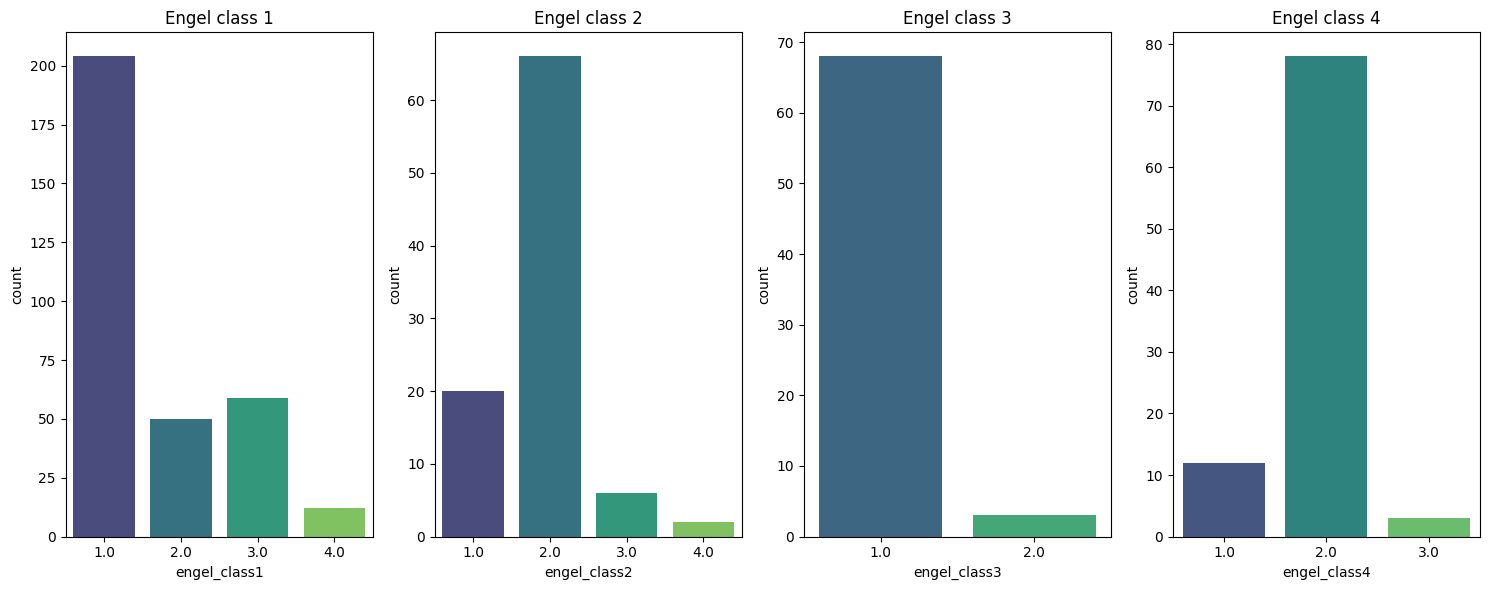

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Plot the distribution for engel_class1
plt.subplot(1, 4, 1)
sns.countplot(x='engel_class1', data=df_engel, palette='viridis')
plt.title('Engel class 1')

# Plot the distribution for engel_class2
plt.subplot(1, 4, 2)
sns.countplot(x='engel_class2', data=df_engel, palette='viridis')
plt.title('Engel class 2')

# Plot the distribution for engel_class3
plt.subplot(1, 4, 3)
sns.countplot(x='engel_class3', data=df_engel, palette='viridis')
plt.title('Engel class 3')

# Plot the distribution for engel_class4
plt.subplot(1, 4, 4)
sns.countplot(x='engel_class4', data=df_engel, palette='viridis')
plt.title('Engel class 4')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Distribution of Race

In [12]:
# Create 1 column out of the 7 dummy variables for race
df_mrn['race'] = df_mrn[['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].idxmax(axis=1).str.split('___').str[1].astype(int)
df_mrn[["record_id", "race"]].head()

C:\Users\Amaury\AppData\Local\Temp\ipykernel_31764\701707759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mrn['race'] = df_mrn[['race___1', 'race___2', 'race___3', 'race___4', 'race___5', 'race___6', 'race___7']].idxmax(axis=1).str.split('___').str[1].astype(int)


,record_id,race
0,RSCT000111,1
12,RSCT000208,7
31,RSCT000277,3
38,RSCT000508,6
42,RSCT000749,3


In [13]:
# Define a mapping dictionary
race_mapping = {1: 'African-American/Black', 2: 'Asian', 3: 'Caucasian/White', 4: 'Native American.Alaska Native', 5: 'Native Hawaiian/Other Pacific Islander', 6: 'Other', 7: 'Unknown/Not-Reported'}

# Count the number of males and females in the dataset
df_mrn["race"].replace(race_mapping).value_counts()

race
Caucasian/White                           460
Other                                      80
African-American/Black                     55
Unknown/Not-Reported                       51
Asian                                      29
Native Hawaiian/Other Pacific Islander      2
Name: count, dtype: int64

## Tables of Na percentage per column

### df_mrn

No data in df_mrn from column 380 and on

In [14]:
# Calculate the percentage of NaN values per column
na_percentage = (df_mrn.iloc[:,:380].isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df_mrn = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Display the resulting DataFrame
print(na_df_mrn)

                        Column  Percentage of NaN
0                    record_id               0.00
1     redcap_repeat_instrument             100.00
2       redcap_repeat_instance             100.00
3                          mrn               0.00
4                   study_site               0.00
..                         ...                ...
375        prev_aeds_name___38               0.00
376        prev_aeds_name___39               0.00
377            aeds_prev_other              84.49
378                  aed_notes              28.21
379  epilepsy_history_complete               0.00

[380 rows x 2 columns]


### df_engel

No data in df_engel before column 3451 and after 3466

In [15]:
# Calculate the percentage of NaN values per column
na_percentage = (df_engel.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df_engel = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Create a new DataFrame with the columns that are completely empty
empty_df_engel = na_df_engel[na_df_engel["Percentage of NaN"]==100]

# Remove columns with only NAs
df_engel_drop = df_engel.drop(columns=empty_df_engel["Column"])

# Display the resulting DataFrame
print(na_df_engel[na_df_engel["Percentage of NaN"]!=100])

                        Column  Percentage of NaN
0                    record_id               0.00
1     redcap_repeat_instrument               0.00
2       redcap_repeat_instance               0.00
3451               eo_reviewer               0.73
3452              eo_date_surg               7.32
3453              eo_date_clin              12.15
3454              eo_type_clin              14.93
3455           eo_yrs_postsurg              13.47
3456            surg_engel___1               0.00
3457            surg_engel___2               0.00
3458            surg_engel___3               0.00
3459            surg_engel___4               0.00
3460              engel_class1              52.42
3461              engel_class2              86.24
3462              engel_class3              89.60
3463              engel_class4              86.38
3464               eo_comments              27.53
3465   engel_outcomes_complete               0.00
4677                surg_engel               0.00


### df

No data in the df in 72 columns 

In [16]:
# Calculate the percentage of NaN values per column
na_percentage = (df.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Create a new DataFrame with the columns that are completely empty
empty_df = na_df[na_df["Percentage of NaN"]==100]

# Remove columns with only NAs
df_drop = df.drop(columns=empty_df["Column"])

In [17]:
# Check for a value in the df
nan_string_check = (df == "nan").any()
print("Columns with '...' values:")
print(nan_string_check[nan_string_check].index)

Columns with '...' values:
Index([], dtype='object')


There appears to be 2 instance where the column "engel_outcomes_complete" has the value 0 instead of 2 which matches with a patient with 3 engel outcomes

In [18]:
df_engel["engel_outcomes_complete"].unique()
df_engel[df_engel["engel_outcomes_complete"]==0]

,record_id,redcap_repeat_instrument,redcap_repeat_instance,mrn,study_site,study_site_other,ny_num_yn,ny_num,other_study_ids,inc_crit,...,cshq_para_raw,cshq_para_z,cshq_breath_raw,cshq_breath_z,cshq_ds_raw,cshq_ds_z,cshq_total_raw,cshq_total_z,neuropsychological_testing_complete,surg_engel
2042,RSCT041607,engel_outcomes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2043,RSCT041607,engel_outcomes,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [19]:
# Display column names and data types in a table
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.astype(str).values,
})

print(column_info)

                              Column Name Data Type
0                               record_id    object
1                redcap_repeat_instrument    object
2                  redcap_repeat_instance   float64
3                                     mrn   float64
4                              study_site   float64
...                                   ...       ...
4672                          cshq_ds_raw    object
4673                            cshq_ds_z    object
4674                       cshq_total_raw    object
4675                         cshq_total_z    object
4676  neuropsychological_testing_complete   float64

[4677 rows x 2 columns]


In [20]:
test = df_drop[df_drop["redcap_repeat_instance"]==1]

# Group by 'record_id' and aggregate non-null values for each column
consolidated_df = df.groupby('record_id').agg(lambda x: x.dropna().iloc[0] if not x.dropna().empty else None)

# Reset the index to get a clean DataFrame
consolidated_df = consolidated_df.reset_index()

# Now, consolidated_df contains one row per patient with non-null information
print(consolidated_df)

# Save dataframe for further use
consolidated_df.to_pickle("../../data/processed/consolidated_df.pkl")

      record_id redcap_repeat_instrument  redcap_repeat_instance        mrn  \
0    RSCT000111     surgical_information                     1.0  8846243.0   
1    RSCT000208     surgical_information                     1.0   845657.0   
2    RSCT000277     surgical_information                     1.0  1715973.0   
3    RSCT000508     surgical_information                     1.0  8981415.0   
4    RSCT000749     surgical_information                     1.0  5078875.0   
..          ...                      ...                     ...        ...   
672  RSCT099499     surgical_information                     1.0  1737071.0   
673  RSCT099739     surgical_information                     1.0  1617602.0   
674  RSCT099741     surgical_information                     1.0  1812168.0   
675  RSCT099755     surgical_information                     1.0  1804561.0   
676  RSCT099914     surgical_information                     1.0  1717631.0   

     study_site study_site_other  ny_num_yn ny_num 

In [21]:
# Calculate the percentage of NaN values per column
na_percentage = (consolidated_df.isna().mean() * 100).round(2)

# Create a new DataFrame with the results
na_consolidated_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage of NaN': na_percentage.values})

# Display the resulting DataFrame
print(na_consolidated_df[na_consolidated_df["Percentage of NaN"]==100])

                     Column  Percentage of NaN
5          study_site_other              100.0
114       epi_clin_reviewer              100.0
333         aed_name_other6              100.0
381      surg_clin_reviewer              100.0
520   resect_les_extent_oth              100.0
...                     ...                ...
4652              srs_sc_t2              100.0
4653         srs_smot_raw_2              100.0
4654            srs_smot_2t              100.0
4655         srs_mann_raw_2              100.0
4656            srs_mann_2t              100.0

[72 rows x 2 columns]


In [22]:
consolidated_df = pd.read_pickle("../../data/processed/consolidated_df.pkl")

print(consolidated_df.isna().sum().sort_values())

record_id                      0
resect_les_hypoth___2          0
resect_les_hypoth___3          0
resect_les_thal___1            0
resect_les_thal___2            0
                            ... 
mri_make_other_2             677
ae_des2                      677
eeg_other_dur                677
seizures_type_pdis_other8    677
eeg_intict_other_period6     677
Length: 4677, dtype: int64


## Print system information

In [24]:
import session_info

session_info.show()